# Análise de Séries Temporais




## Introdução


Aqui almejo criar um base line para comparativo de ad_tests futuros com Neuro-Evolução

### Estrutura do Projeto
- **Data:** Obtido a partir do site kaggle.com, se trata do consumo energético da india(2019-2020)
- **Pré-processamento:** A fazer
- **Análise Exploratória:** A fazer
- **Modelagem:** A fazer
- **Avaliação:** A fazer
- **Conclusão:** A fazer

# Código

## Importação de LIBs

In [422]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pmdarima import model_selection
from arch import arch_model


## Leitura e Visualização dos Dados
**"dataSet" é a variável que recebe os dados brutos**

Leitura do DataSet selecionado para estudo

In [423]:
dataSet = pd.read_csv('./dataset_tk.csv', decimal='.')

dataSet["data"] = [pd.Timestamp( \
    day = int(item.split(" ")[0].strip().split("/")[0]), \
    month = int(item.split(" ")[0].strip().split("/")[1]), \
    year = int(item.split(" ")[0].strip().split("/")[2]) \
) for item in dataSet["data"]]

dataSet

,data,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


Analisando se há valores nulos e tipo de valor da variável

In [424]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data               503 non-null    datetime64[ns]
 1   Punjab             503 non-null    float64       
 2   Haryana            503 non-null    float64       
 3   Rajasthan          503 non-null    float64       
 4   Delhi              503 non-null    float64       
 5   UP                 503 non-null    float64       
 6   Uttarakhand        503 non-null    float64       
 7   HP                 503 non-null    float64       
 8   J&K                503 non-null    float64       
 9   Chandigarh         503 non-null    float64       
 10  Chhattisgarh       503 non-null    float64       
 11  Gujarat            503 non-null    float64       
 12  MP                 503 non-null    float64       
 13  Maharashtra        503 non-null    float64       
 14  Goa       

Analisando características estatísticas

In [425]:
dataSet.describe()

,data,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,2019-09-25 13:27:18.966202880,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
min,2019-01-02 00:00:00,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,2019-05-11 12:00:00,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,2019-09-12 00:00:00,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,2020-01-25 12:00:00,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,2020-12-05 00:00:00,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000
std,NaN,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047


## Análise de Séries Temporais

#### Configurações básicas

**Criando uma coluna com o consumo total de energia ao longo do tempo**

In [426]:
dataSet.insert(1, "consumoTotal", dataSet.iloc[:, 1:].sum(axis=1))
dataSet['consumoTotal']

0      3373.4
1      3403.7
2      3304.1
3      3308.9
4      3316.9
        ...  
498    3741.5
499    3763.8
500    3726.6
501    3642.1
502    3407.0
Name: consumoTotal, Length: 503, dtype: float64

**Seleção da Série**

In [427]:
data = dataSet['consumoTotal']

**Normalizando**

In [428]:
#data = np.log(data)

**Definindo Parâmetros**

In [429]:
periodicidade = 31

#### Checando Estacionariedade

##### Diferenciando (se necessário)

In [430]:
#data.diff().dropna()

In [431]:
adFUllerTest = adfuller(data)
print(f"Estatística do teste ADF: {adFUllerTest[0]}")
print(f"Valor-p: {adFUllerTest[1]:.16f}")
print("Valores críticos:")
for key, value in adFUllerTest[4].items():
    print(f"   {key}: {value}")

# Interpretação
if adFUllerTest[1] <= 0.005:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

Estatística do teste ADF: -5.940089379866558
Valor-p: 0.0000002271784085
Valores críticos:
   1%: -3.4436298692815304
   5%: -2.867396599893435
   10%: -2.5698893429241916
A série é estacionária.


### AutoCorrelação

#### Função de AutoCorrelação

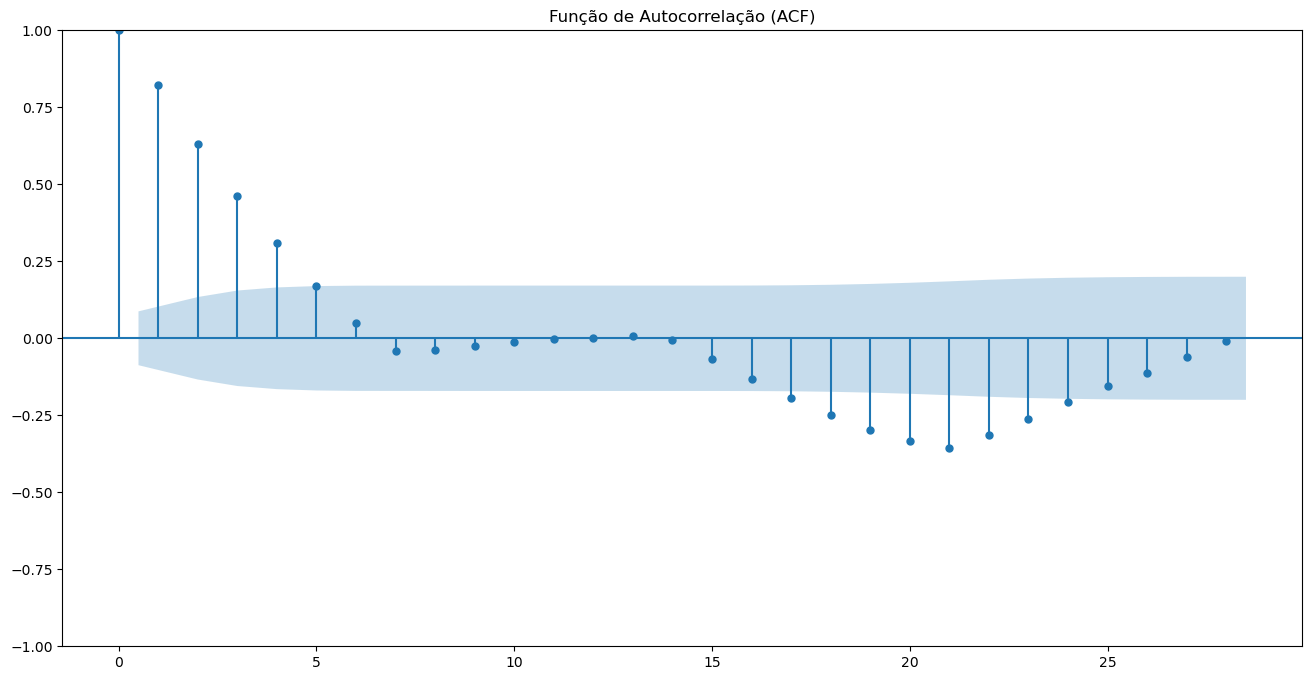

In [432]:
plt.figure(figsize=(16, 8))
plot_acf(data, ax=plt.gca())
plt.title('Função de Autocorrelação (ACF)')
plt.show()

#### Função de AutoCorrelação Parcial

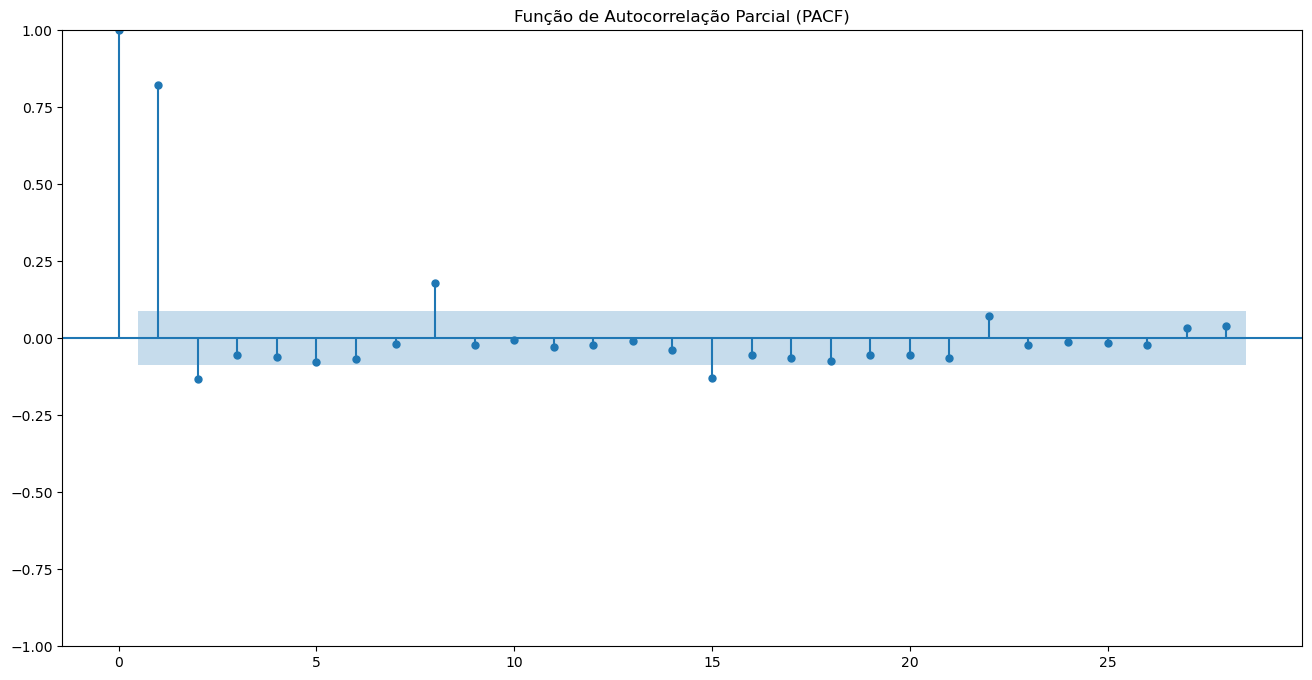

In [433]:
plt.figure(figsize=(16, 8))
plot_pacf(data, ax=plt.gca())
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

In [ ]:
anderson(data)

Estatística do teste AD: 1.1848533302803617
Valores críticos: [0.572 0.651 0.781 0.911 1.083]
Níveis de significância: [15.  10.   5.   2.5  1. ]


**Dados para Treino**

## Testes

### Testes e visualização da distribuição da série

#### Teste com tendência

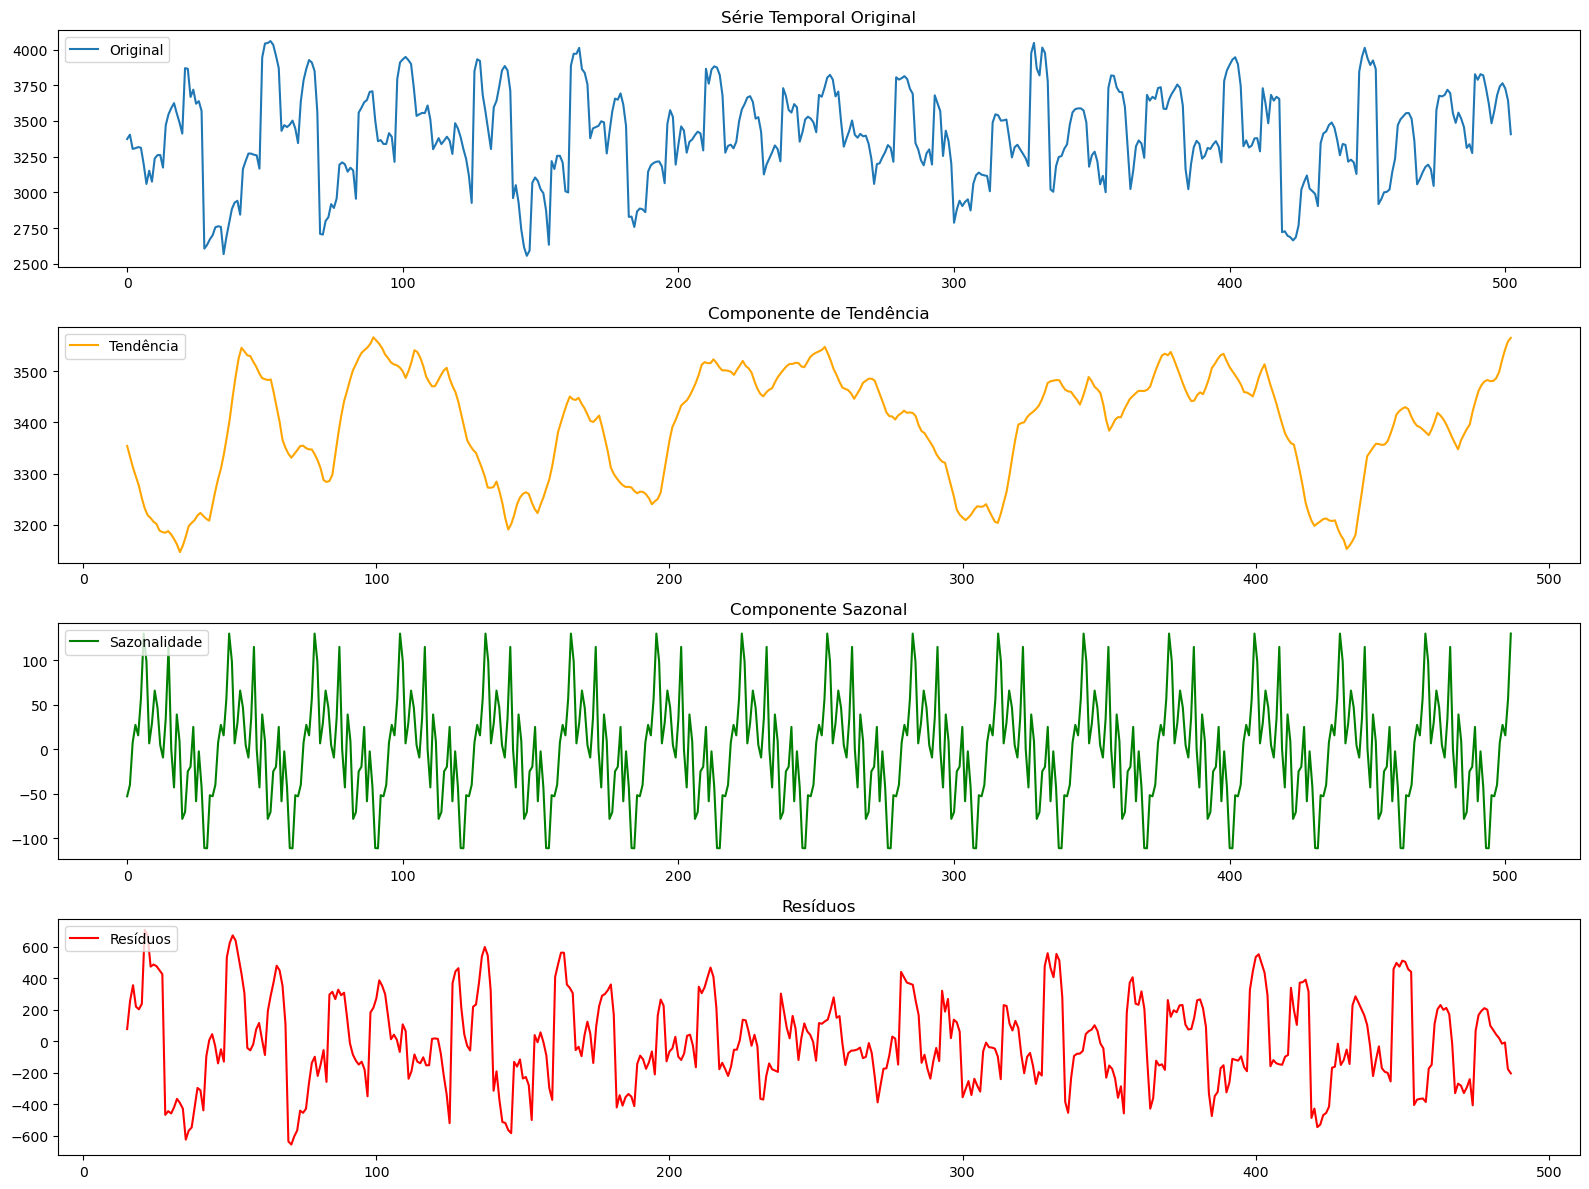

In [ ]:
decomposicao = seasonal_decompose(data, model='additive', period=periodicidade)

plt.figure(figsize=(16, 12))

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

#### Teste removendo a tendência

##### Primeira Diferenciação

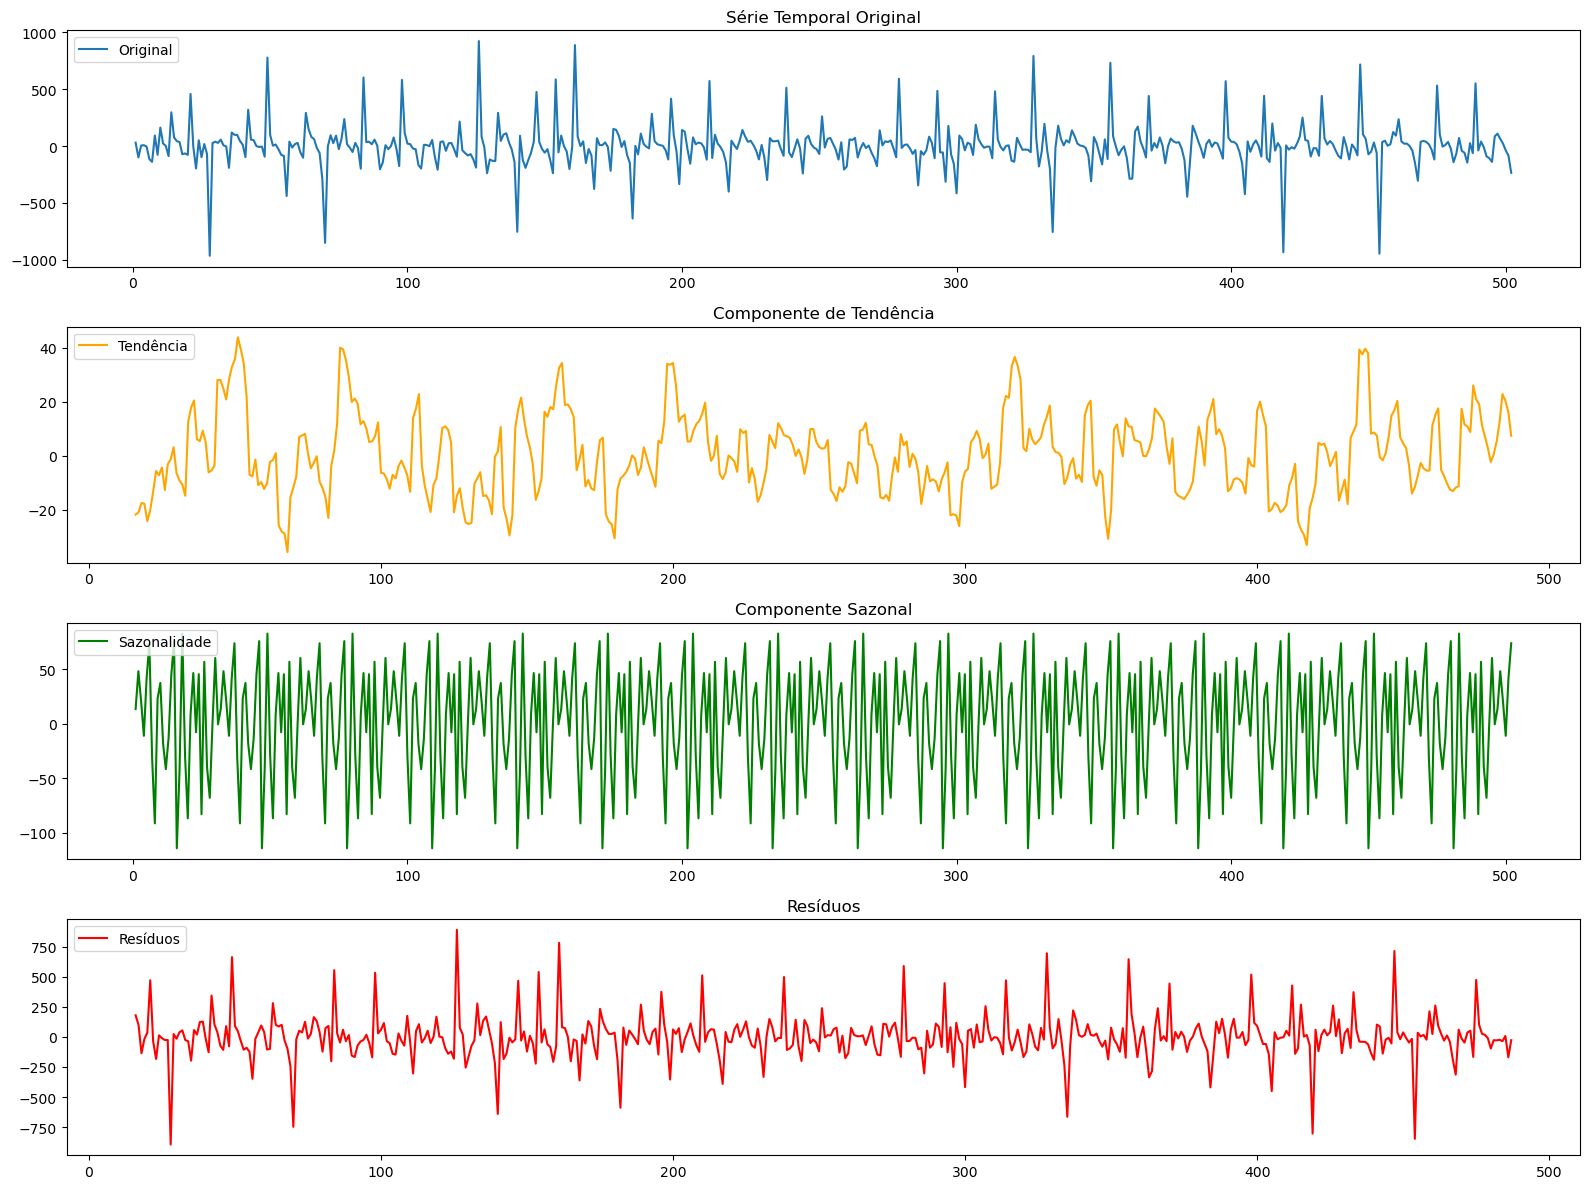

In [ ]:
dataDiff1 = dataSet['consumoTotal'].diff().dropna()

decomposicao = seasonal_decompose(dataDiff1, model='additive', period=periodicidade)

plt.figure(figsize=(16, 12))

plt.subplot(411)
plt.plot(dataDiff1, label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

##### Segunda diferenciação

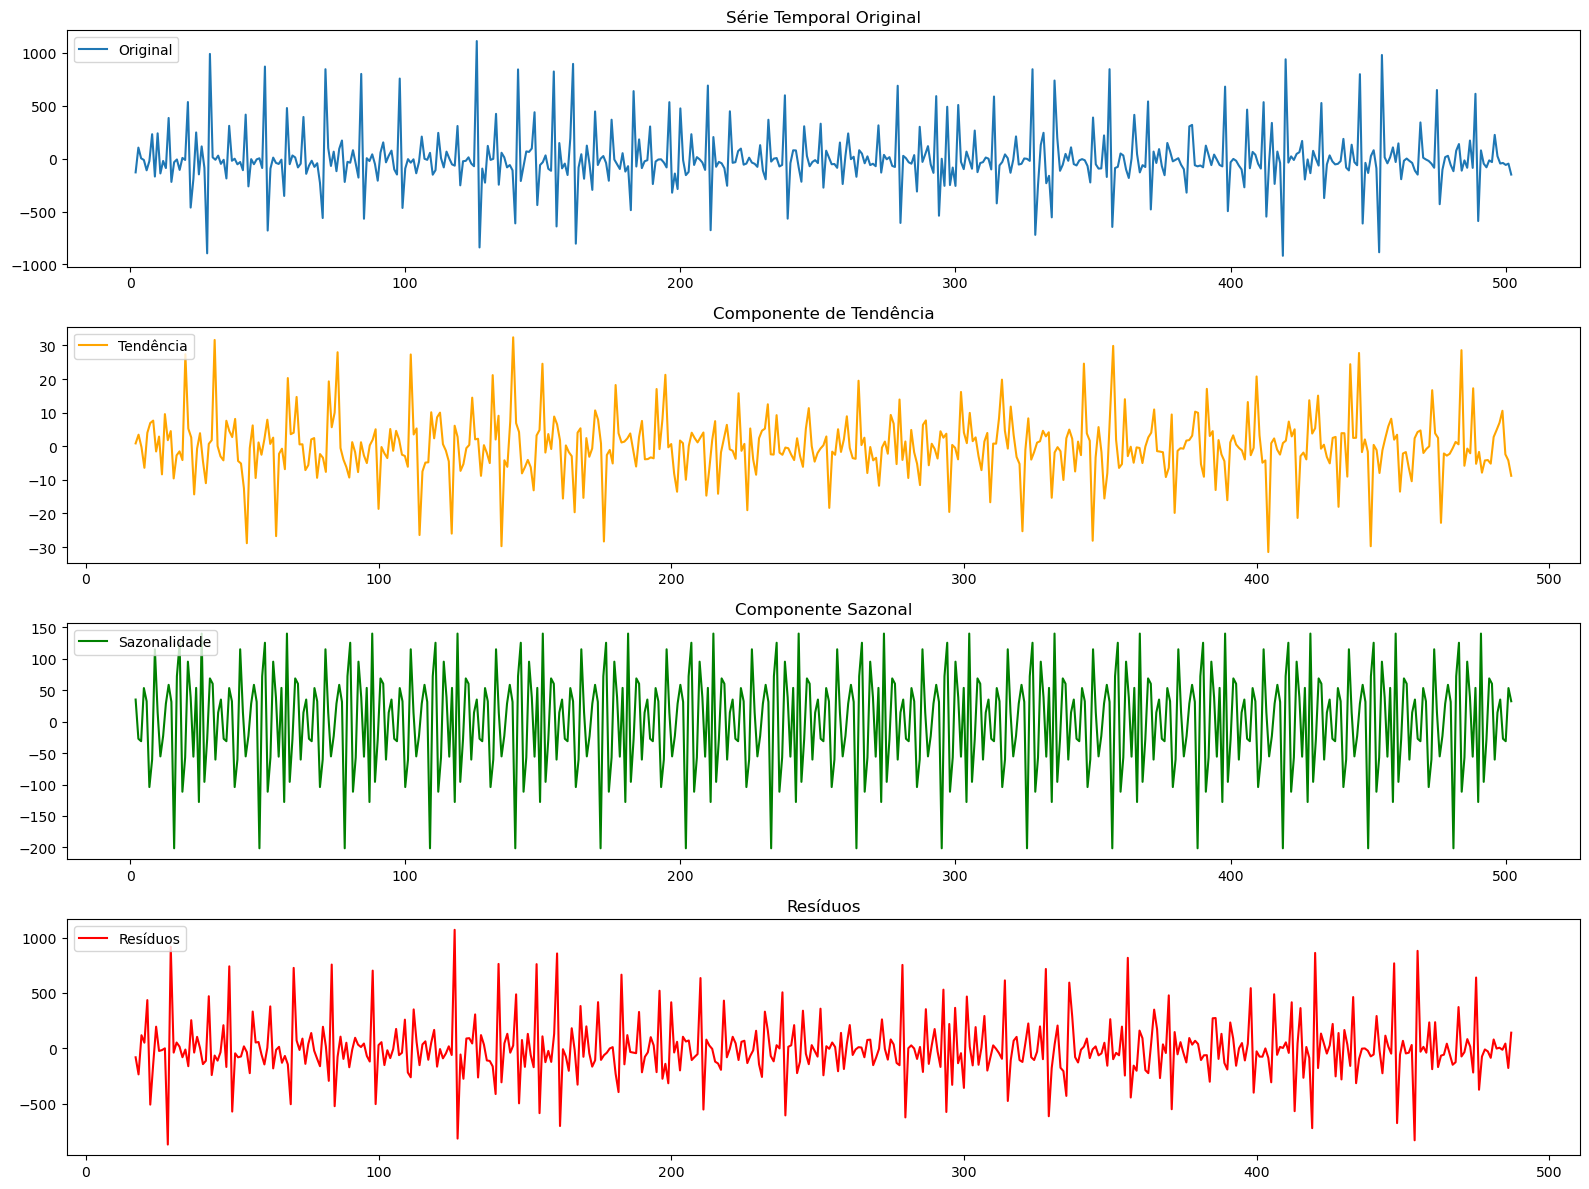

In [ ]:
dataDiff2 = dataDiff1.diff().dropna()

decomposicao = seasonal_decompose(dataDiff2, model='additive', period=periodicidade)

plt.figure(figsize=(16, 12))

plt.subplot(411)
plt.plot(dataDiff2, label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

#### Histograma

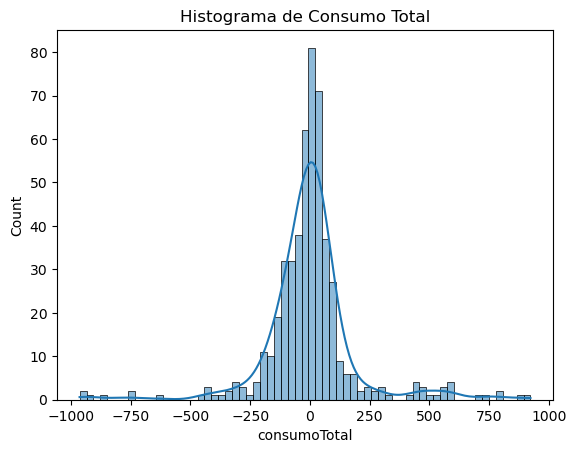

In [ ]:
sns.histplot(dataDiff1, kde=True)
plt.title('Histograma de Consumo Total')
plt.show()

#### Gráfico Q-Q

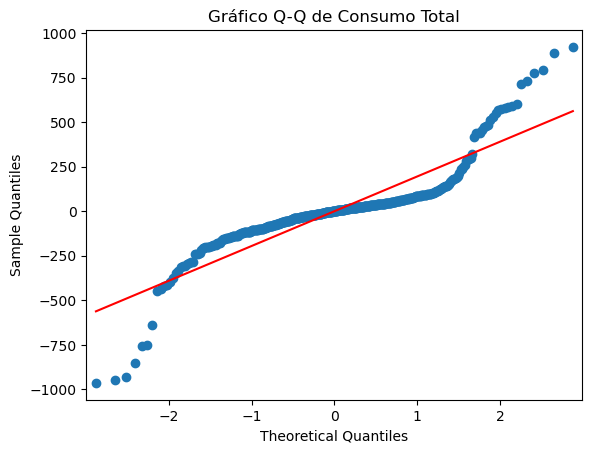

In [ ]:
sm.qqplot(dataDiff1, line='s')
plt.title('Gráfico Q-Q de Consumo Total')
plt.show()

#### Teste Shapiro-Wilk

In [ ]:
def shapiro(data):
    shapiroTest = stats.shapiro(data)
    print('Shapiro-Wilk Test:')
    print(f'W= {shapiroTest[0]:.8f}')
    print(f'Valor-P= {shapiroTest[1]:.8f}')
    print()

#### Teste Kolmogorov-Smirnov

In [ ]:
def smirnov(data):
    smirnovTest, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f'Estatística KS: {smirnovTest:.8f}')
    print(f'Valor p: {p_value:.8f}')
    print(p_value+smirnovTest)
    # Interpretando o resultado
    alpha = 0.05
    if p_value < alpha:
        print("Rejeitamos a hipótese nula: a amostra não segue uma distribuição normal")
    else:
        print("Não rejeitamos a hipótese nula: a amostra segue uma distribuição normal")
    print()

#### Realizar o teste de Anderson-Darling

In [ ]:
def anderson(data):
    andersonTest = stats.anderson(data, dist='norm')
    print(f"Estatística do teste AD: {andersonTest.statistic}")
    print("Valores críticos:", andersonTest.critical_values)
    print("Níveis de significância:", andersonTest.significance_level)

### ARIMA